In [253]:
import os
import pandas as pd
import numpy as np
from pandas.core.dtypes.common import is_numeric_dtype
import matplotlib.pyplot as plt
import seaborn as sns

In [254]:
DATA_FOLDER = 'dataset'
DATASET = os.path.join(DATA_FOLDER, 'outliers_removed.csv')

In [255]:
df = pd.read_csv(DATASET)

possible_targets = [col for col in df.columns if not is_numeric_dtype(df[col])]
df[possible_targets]

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex
0,speech,neutral,normal,Kids are talking by the door,2nd,actor_1,M
1,speech,neutral,normal,Dogs are sitting by the door,1st,actor_1,M
2,speech,neutral,normal,Dogs are sitting by the door,2nd,actor_1,M
3,speech,calm,normal,Kids are talking by the door,1st,actor_1,M
4,speech,calm,normal,Kids are talking by the door,2nd,actor_1,M
...,...,...,...,...,...,...,...
2424,song,fearful,normal,Dogs are sitting by the door,2nd,actor_24,F
2425,song,fearful,strong,Kids are talking by the door,1st,actor_24,F
2426,song,fearful,strong,Kids are talking by the door,2nd,actor_24,F
2427,song,fearful,strong,Dogs are sitting by the door,1st,actor_24,F


In [256]:
TARGET_COLUMN = 'vocal_channel'

In [257]:
values = df[TARGET_COLUMN].unique().tolist()
values

['speech', 'song']

In [258]:
one_hot = pd.get_dummies(df[TARGET_COLUMN])
df = df.join(one_hot)
df = df.drop([TARGET_COLUMN], axis=1)

In [259]:
def plot_percentage(data, columns):
    ones_percentage = [data[col].mean() * 100 for col in columns]

    plt.figure(figsize=(10, 6))
    plt.bar(columns, ones_percentage)
    plt.xlabel('Columns')
    plt.ylabel('Percentage of ones')
    plt.title('Percentage of ones in each column')
    plt.ylim(0, 100)
    plt.xticks(rotation=45)
    plt.yticks(range(0, 101, 10))  # increments of 10 along the y-axis
    plt.show()

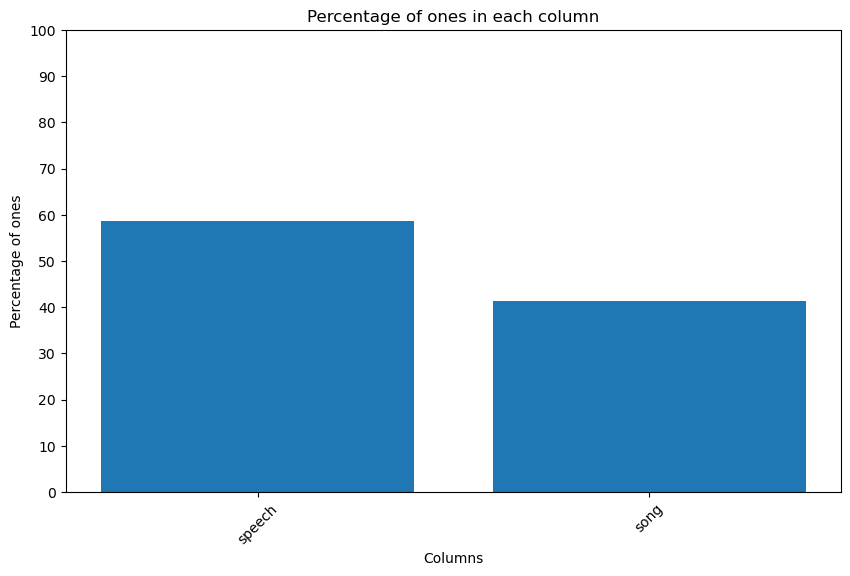

In [260]:
plot_percentage(df, values)

## Visualize the target class

In [261]:
TARGET_CLASS = 'song'

In [262]:
from sklearn.manifold import Isomap
from sklearn.preprocessing import MinMaxScaler

def isomap_by_class(data, values_list, value):

    data2 = data.drop(values_list, axis=1)
    X_scaled = MinMaxScaler().fit_transform(data2)

    isomap = Isomap(n_components=2)
    embedding = isomap.fit_transform(X_scaled)

    plt.figure(figsize=(8, 6))
    plt.scatter(embedding[:, 0], embedding[:, 1], c=data[value], cmap='viridis')
    plt.xlabel('First component')
    plt.ylabel('Second component')
    plt.title(f'Scatterplot of {value} attribute using Isomap')
    plt.show()

In [263]:
from sklearn.decomposition import PCA

def pca_by_class(data, values_list, value):

    data2 = data.drop(values_list, axis=1)
    X_scaled = MinMaxScaler().fit_transform(data2)

    pca = PCA(n_components=2)
    embedding = pca.fit_transform(X_scaled)

    plt.figure(figsize=(8, 6))
    plt.scatter(embedding[:, 0], embedding[:, 1], c=data[value], cmap='viridis')
    plt.xlabel('First component')
    plt.ylabel('Second component')
    plt.title(f'Scatterplot of {value} attribute using PCA')
    plt.show()

In [264]:
numerical_attr_list = [col for col in df.columns if is_numeric_dtype(df[col])]

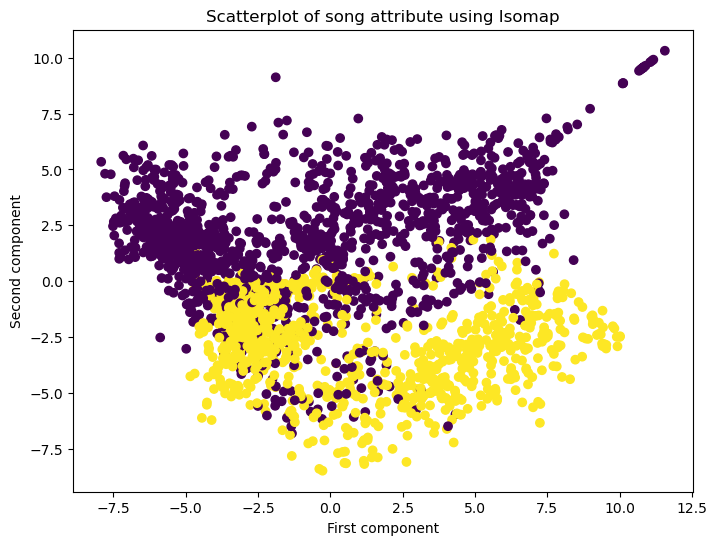

In [265]:
isomap_by_class(df[numerical_attr_list], values, TARGET_CLASS)

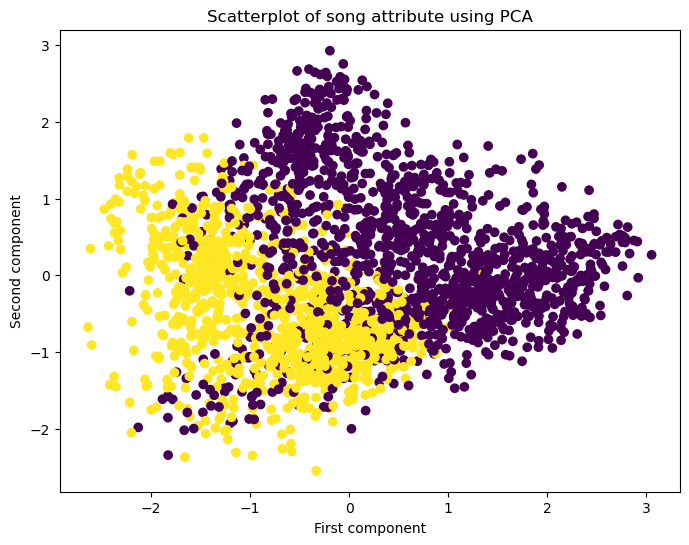

In [266]:
pca_by_class(df[numerical_attr_list], values, TARGET_CLASS)

## Dataset imbalance

In [267]:
split_index = df.index[df['actor'] == 'actor_19'][0]

df_train = df[:split_index]
df_test = df[split_index:]

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [268]:
target_class_count = df_train[TARGET_CLASS].sum()
other_class_count = df_train.shape[0] - target_class_count
eight_percent = int(other_class_count * 8 / 100)

# target class is 8% the size of the other one
rows_to_keep = np.random.choice(df_train[df_train[TARGET_CLASS] == 1].index, eight_percent, replace=False)
df_train = df_train[(df_train[TARGET_CLASS] == 1 & df_train.index.isin(rows_to_keep)) | (df_train[TARGET_CLASS] == 0)]

df_train = df_train.reset_index(drop=True)

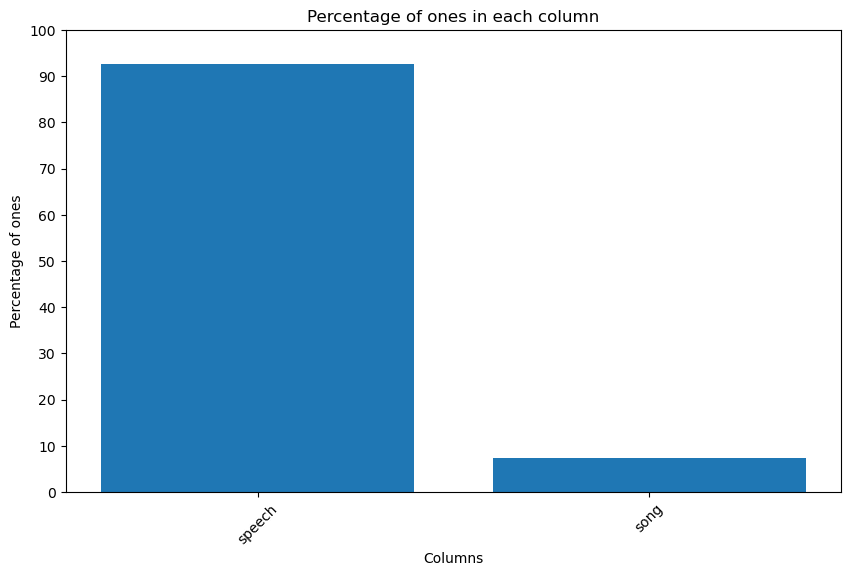

In [269]:
plot_percentage(df_train, values)

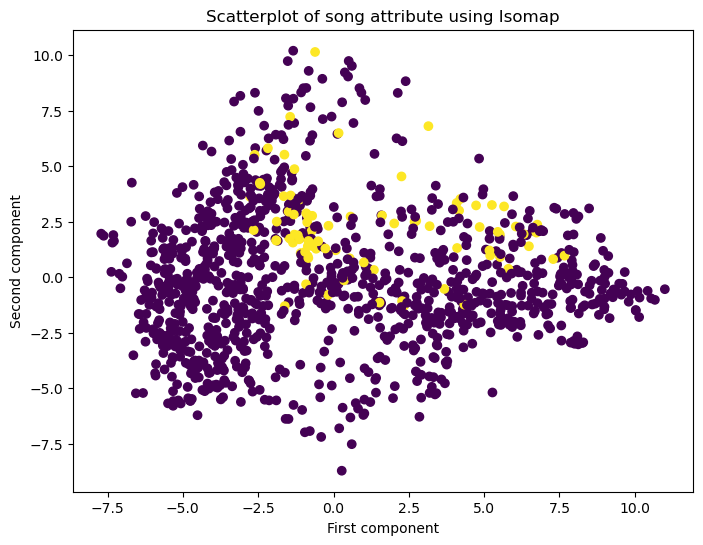

In [270]:
isomap_by_class(df_train[numerical_attr_list], values, TARGET_CLASS)

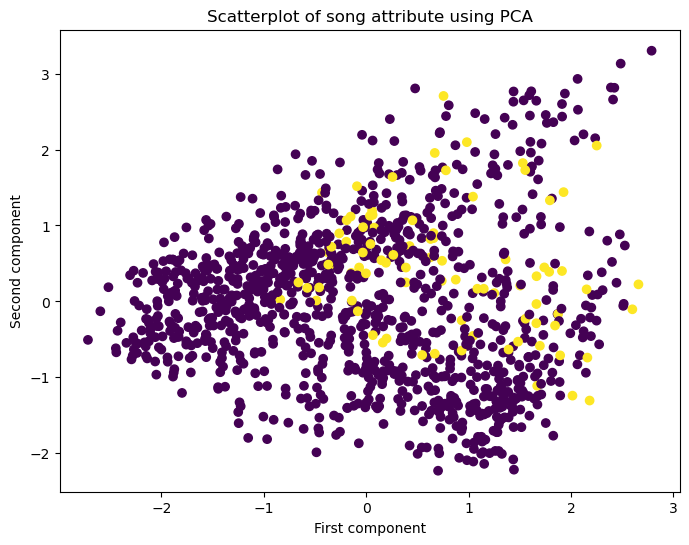

In [271]:
pca_by_class(df_train[numerical_attr_list], values, TARGET_CLASS)

# Dataset preparation

In [272]:
target_train = df_train[TARGET_CLASS]
target_test = df_test[TARGET_CLASS]

display(df_train.shape, df_test.shape)

(1155, 251)

(619, 251)

In [273]:
excluded_prefixes = ['zc']
columns_to_keep = []

for column in df[numerical_attr_list].drop(values, axis=1).columns:
    if not column.startswith(tuple(excluded_prefixes)) and column != TARGET_COLUMN:
        columns_to_keep.append(column)

# selected features without target
columns_to_keep

['frame_count',
 'sum',
 'mean',
 'std',
 'min',
 'max',
 'q01',
 'q05',
 'q25',
 'q75',
 'q95',
 'q99',
 'kur',
 'skew',
 'lag1_std',
 'lag1_min',
 'lag1_max',
 'lag1_q01',
 'lag1_q05',
 'lag1_q25',
 'lag1_q75',
 'lag1_q95',
 'lag1_q99',
 'lag1_kur',
 'lag1_skew',
 'mfcc_sum',
 'mfcc_mean',
 'mfcc_std',
 'mfcc_min',
 'mfcc_max',
 'mfcc_q01',
 'mfcc_q05',
 'mfcc_q25',
 'mfcc_q50',
 'mfcc_q75',
 'mfcc_q95',
 'mfcc_q99',
 'mfcc_kur',
 'mfcc_skew',
 'sc_sum',
 'sc_mean',
 'sc_std',
 'sc_min',
 'sc_max',
 'sc_q01',
 'sc_q05',
 'sc_q25',
 'sc_q50',
 'sc_q75',
 'sc_q95',
 'sc_q99',
 'sc_kur',
 'sc_skew',
 'stft_sum',
 'stft_mean',
 'stft_std',
 'stft_min',
 'stft_q01',
 'stft_q05',
 'stft_q25',
 'stft_q50',
 'stft_q75',
 'stft_kur',
 'stft_skew',
 'length_w1',
 'sum_w1',
 'std_w1',
 'q05_w1',
 'kur_w1',
 'skew_w1',
 'lag1_mean_w1',
 'lag1_max_w1',
 'lag1_q95_w1',
 'lag1_kur_w1',
 'lag1_skew_w1',
 'mfcc_sum_w1',
 'mfcc_mean_w1',
 'mfcc_std_w1',
 'mfcc_min_w1',
 'mfcc_max_w1',
 'mfcc_q05_w1',


In [274]:
df_train = df_train.drop(df_train.columns.difference(columns_to_keep), axis=1)
df_test = df_test.drop(df_test.columns.difference(columns_to_keep), axis=1)

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [275]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(df_train)
X_test = scaler.fit_transform(df_test)

y_train = target_train.to_numpy()
y_test = target_test.to_numpy()

# Undersampling
## CNN

In [276]:
from collections import Counter
from imblearn.under_sampling import CondensedNearestNeighbour

cnn = CondensedNearestNeighbour(random_state=42, n_jobs=-1)
X_res, y_res = cnn.fit_resample(X_train, y_train)

print(f'Starting dataset shape {Counter(y_train)}')
print(f'Resampled dataset shape {Counter(y_res)}')

Starting dataset shape Counter({0: 1070, 1: 85})
Resampled dataset shape Counter({1: 85, 0: 79})


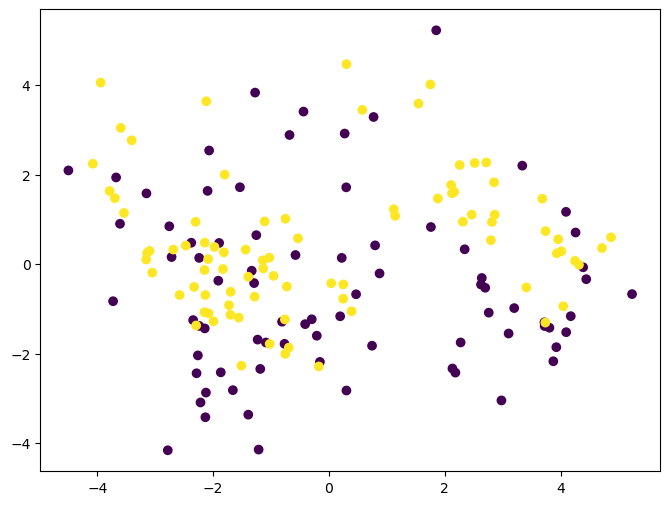

In [277]:
isomap = Isomap(n_components=2, n_neighbors=10)
embedding = isomap.fit_transform(X_res)

plt.figure(figsize=(8, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=y_res, cmap='viridis')
plt.show()

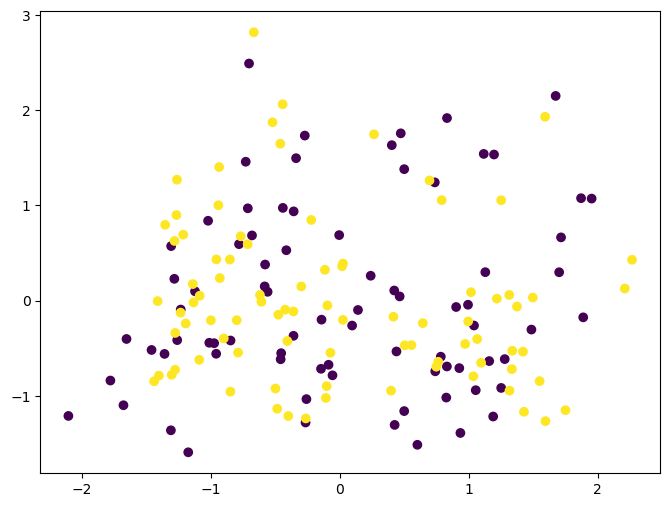

In [278]:
pca = PCA(n_components=2)
embedding = pca.fit_transform(X_res)

plt.figure(figsize=(8, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=y_res, cmap='viridis')
plt.show()

# Logistic Regression

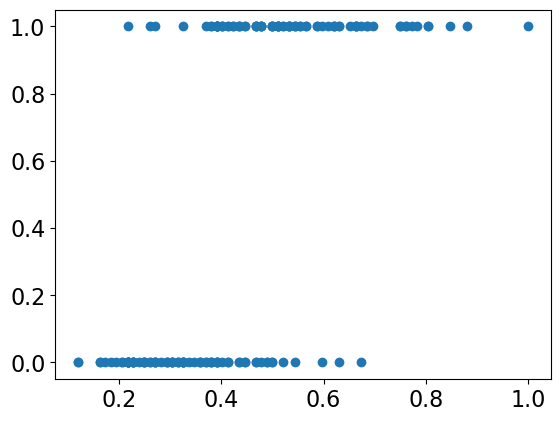

In [27]:
plt.scatter(X_res.T[0], y_res)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

In [43]:
parameters = [{'penalty':['none', 'elasticnet', 'l1', 'l2']}, #l1(Ridge), l2(Lasso), elasticnet(both)
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]}] #Inverse of regularization strength (smaller better)



grid = GridSearchCV(estimator = LogisticRegression(solver='liblinear'),  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = RepeatedStratifiedKFold(random_state=0),
                           )


grid.fit(X_res.T[0].reshape(-1,1), y_res)
clf = grid.best_estimator_
print(grid.best_params_, grid.best_score_)

{'penalty': 'l2'} 0.7902673796791444


C:\Users\emanu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\emanu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\emanu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\emanu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 464, in _check_solver
    raise ValueError("pe

In [44]:
clf.__dict__

{'penalty': 'l2',
 'dual': False,
 'tol': 0.0001,
 'C': 1.0,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'random_state': None,
 'solver': 'liblinear',
 'max_iter': 100,
 'multi_class': 'auto',
 'verbose': 0,
 'warm_start': False,
 'n_jobs': None,
 'l1_ratio': None,
 'n_features_in_': 1,
 'classes_': array([0, 1], dtype=uint8),
 'coef_': array([[3.93464631]]),
 'intercept_': array([-1.61805971]),
 'n_iter_': array([3], dtype=int32)}

choose liblinear solver beacause for small datasets is a good choice. 
The key difference between these l1(ridege) and l2(lasso) is that Lasso shrinks the less 
important feature’s coefficient to zero thus, removing some feature altogether. 
So, this works well for feature selection in case we have a huge number of features.

In [45]:
clf.score(X_test.T[0].reshape(-1,1), y_test),  clf.intercept_, clf.coef_

(0.9095315024232633, array([-1.61805971]), array([[3.93464631]]))

In [46]:
from sklearn.metrics import classification_report

y_test_pred = clf.predict(X_test.T[0].reshape(-1,1))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       356
           1       0.92      0.86      0.89       263

    accuracy                           0.91       619
   macro avg       0.91      0.90      0.91       619
weighted avg       0.91      0.91      0.91       619



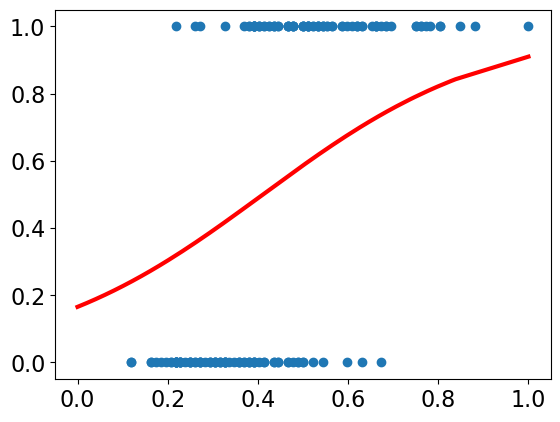

In [47]:
from scipy.special import expit

loss = expit(sorted(X_test.T[0].reshape(-1,1)) *clf.coef_.T[0] + clf.intercept_).ravel()
plt.plot(sorted(X_test.T[0].reshape(-1,1)), loss, color='red', linewidth=3)
plt.scatter(X_res.T[0].reshape(-1,1), y_res)
#plt.xlabel(selected_columns[0], fontsize=16)
#plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

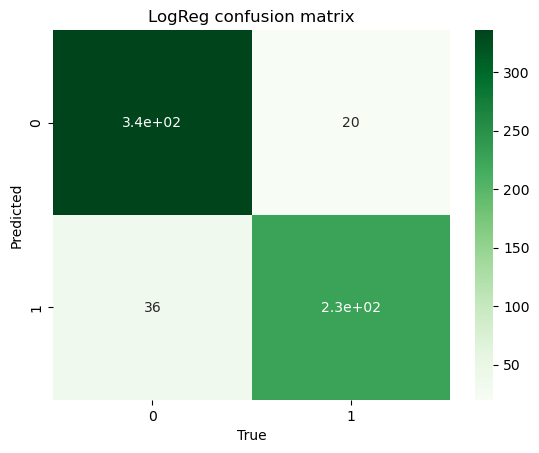

In [48]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf, annot=True, cmap='Greens')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('LogReg confusion matrix')
plt.show()

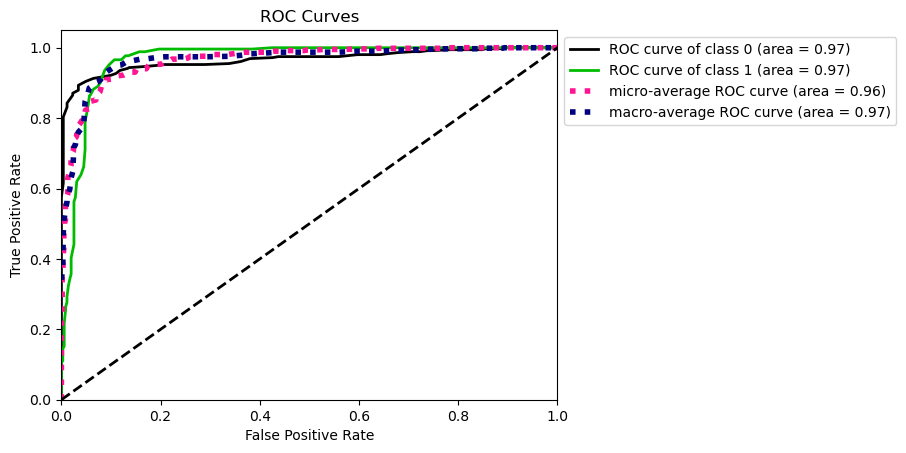

0.9655658563677533


In [49]:
from sklearn.metrics import roc_auc_score
from scikitplot.metrics import plot_roc

y_test_pred_proba = clf.predict_proba(X_test.T[0].reshape(-1,1))
plot_roc(y_test, y_test_pred_proba)
plt.legend(bbox_to_anchor=(1,1))
plt.show()
print(roc_auc_score(y_test, y_test_pred_proba[:, 1], multi_class='ovr', average='macro'))

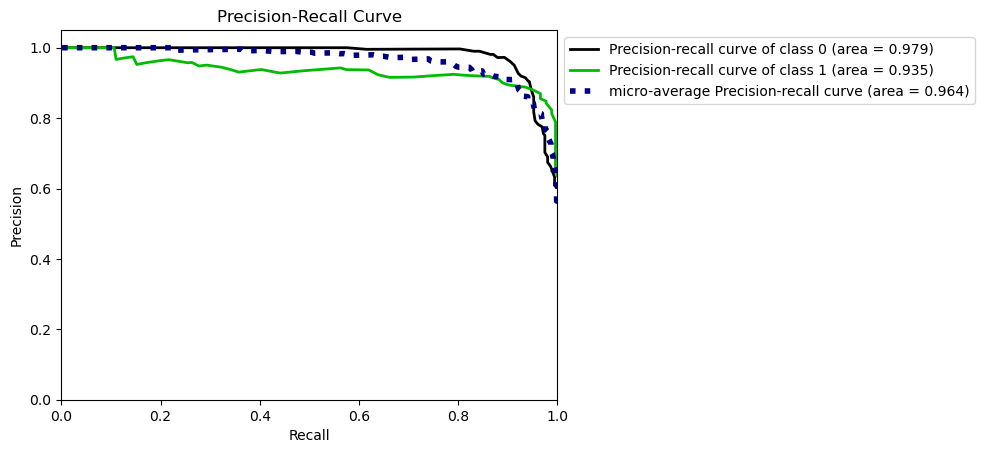

In [50]:
from scikitplot.metrics import plot_precision_recall

plot_precision_recall(y_test, clf.predict_proba(X_test.T[0].reshape(-1,1)))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

# Suppport Vector Machine

In [114]:
pca = PCA(n_components=2)
pca.fit(X_res)
X_pca = pca.transform(X_res)

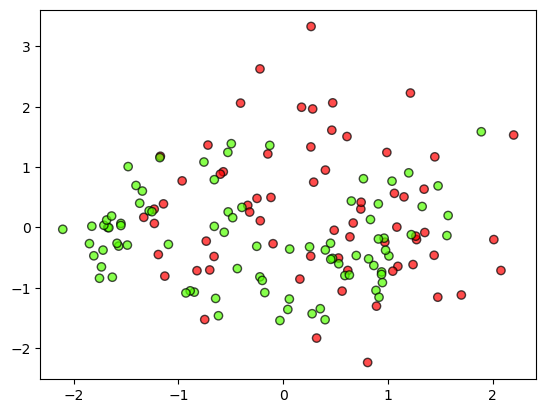

In [115]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

## Linear SVM

In [74]:
from sklearn.svm import LinearSVC

In [131]:
parameters = [{'C': [ 1, 10, 100, 1000]},
              {'loss':['hinge', 'squared_hinge']},
              {'penalty':['l1', 'l2']}]     


grid = GridSearchCV(estimator = LinearSVC(),  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           refit = True,
                           cv = RepeatedStratifiedKFold(random_state=0),
                           )


grid.fit(X_res, y_res)
clf = grid.best_estimator_
print(grid.best_params_, grid.best_score_)

C:\Users\emanu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\emanu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\emanu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\emanu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\emanu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\emanu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\emanu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\emanu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\emanu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\emanu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\emanu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\emanu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\emanu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\emanu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\emanu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\emanu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\emanu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\emanu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\emanu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\emanu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\emanu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\emanu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\emanu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\emanu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

C:\Users\emanu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\emanu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\emanu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\emanu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\emanu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\emanu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

{'C': 1} 0.94


C:\Users\emanu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\emanu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\emanu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\emanu\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 257, in fit
    self.coef_, self.intercept_, self.n_ite

In [117]:
clf.__dict__

{'dual': True,
 'tol': 0.0001,
 'C': 1,
 'multi_class': 'ovr',
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'verbose': 0,
 'random_state': None,
 'max_iter': 1000,
 'penalty': 'l2',
 'loss': 'squared_hinge',
 'n_features_in_': 231,
 'classes_': array([0, 1], dtype=uint8),
 'coef_': array([[ 4.14989493e-01, -4.70208672e-03, -1.76933973e-03,
         -1.61628782e-01,  1.85799107e-01, -1.60491240e-01,
          2.12461545e-01,  8.96813439e-02, -1.55900552e-01,
          5.03043023e-01, -9.19703423e-02, -2.28651419e-01,
         -2.96253879e-01, -8.49690548e-02, -2.63007538e-02,
         -1.47493102e-01,  1.77456209e-01,  5.66680225e-02,
          1.30319148e-01, -2.45645398e-02, -2.09856765e-01,
         -9.25117435e-02, -2.49937306e-02, -6.43716139e-02,
         -3.18707036e-02, -1.75019624e-01,  1.27621790e-01,
         -1.66689776e-01,  1.29933986e-01, -5.04266691e-01,
          1.08340122e-01, -9.59698071e-02, -1.14689319e-01,
          3.47284230e-01,  1.3

In [132]:
y_test_pred = clf.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       356
           1       1.00      0.89      0.94       263

    accuracy                           0.95       619
   macro avg       0.96      0.94      0.95       619
weighted avg       0.96      0.95      0.95       619



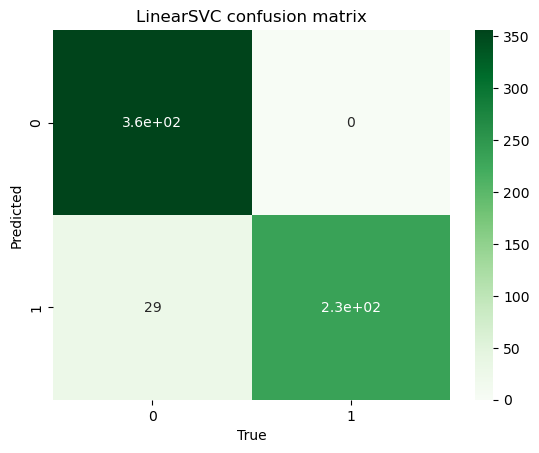

In [133]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf, annot=True, cmap='Greens')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('LinearSVC confusion matrix')
plt.show()

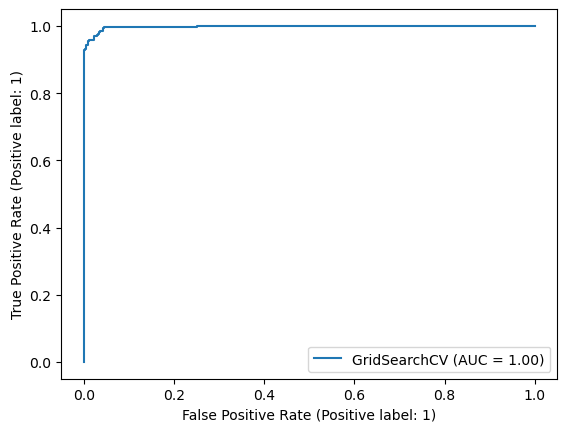

In [134]:
from sklearn.metrics import RocCurveDisplay

linear_svc_disp = RocCurveDisplay.from_estimator(grid, X_test, y_test)

In [135]:
decision_function = clf.decision_function(X_res)
support_vector_indices = np.where((2 * y_res - 1) * decision_function <= 1)[0]
support_vectors = X_res[support_vector_indices]

In [136]:
support_vectors_pca = pca.transform(support_vectors)

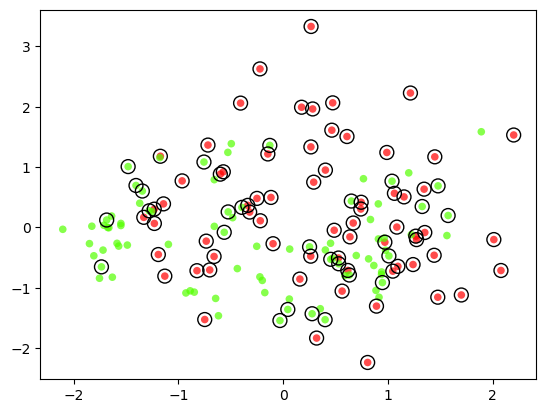

In [137]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

C:\Users\emanu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\emanu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


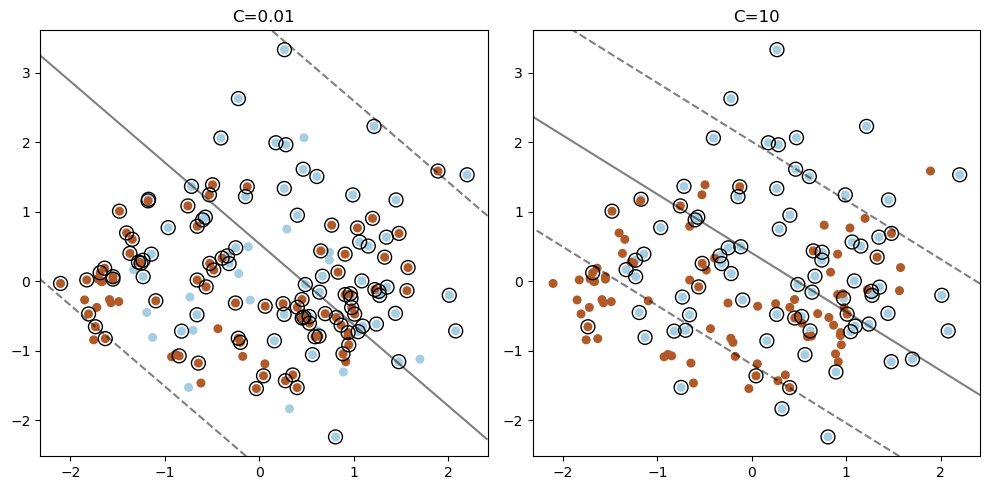

In [138]:
plt.figure(figsize=(10, 5))
for i, C in enumerate([0.01, 10]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X_res, y_res)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X_res)
#     we can also calculate the decision function manually
#     decision_function = np.dot(X_pca, clf.coef_[0]) + clf.intercept_[0]
    support_vector_indices = np.where((2 * y_res - 1) * decision_function <= 1)[0]
    support_vectors = X_res[support_vector_indices]
    support_vectors_pca = pca.transform(support_vectors)

    plt.subplot(1, 2, i + 1)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X_pca, y_res)
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
    #plt.scatter(clf.coef_[:, 0] + clf.intercept_, clf.coef_[:, 1] + clf.intercept_)
plt.tight_layout()
plt.show()

The goal for SVM is find hyperplane that maximizes the margin, furthermore C is the inverse of regularization strength therefore smaller value of C correspond a stronger regularization namely greater margin

## Nonlinear SVM

In [142]:
from sklearn.svm import SVC

In [143]:
parameters = [{'C': [0.1,1, 10, 100], 
               'gamma': [1,0.1,0.01,0.001], # like C gamma is a parameters representing the penalty of misclassifying
               'kernel': ['rbf', 'poly', 'sigmoid']}]


grid = GridSearchCV(estimator = SVC(),  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           refit = True,
                           cv = RepeatedStratifiedKFold(random_state=0),
                           )


grid.fit(X_res, y_res)
clf = grid.best_estimator_
print(grid.best_params_, grid.best_score_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'} 0.9524946236559141


In [145]:
y_test_pred = clf.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       356
           1       1.00      0.86      0.93       263

    accuracy                           0.94       619
   macro avg       0.95      0.93      0.94       619
weighted avg       0.95      0.94      0.94       619



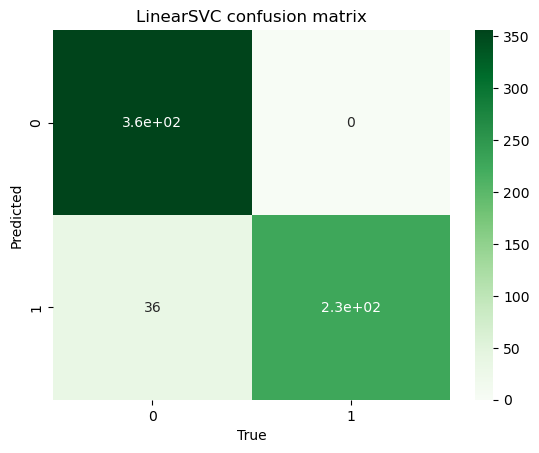

In [146]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf, annot=True, cmap='Greens')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('LinearSVC confusion matrix')
plt.show()

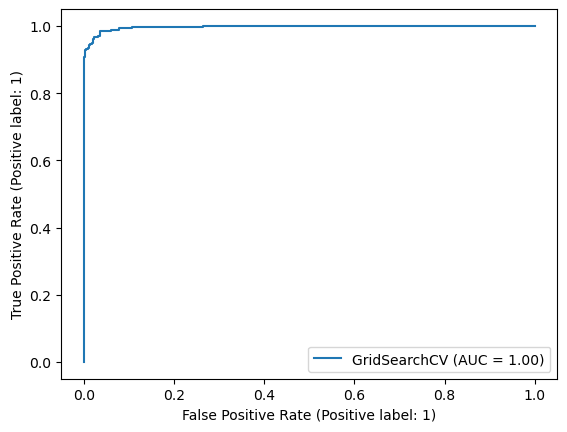

In [147]:
svc_disp = RocCurveDisplay.from_estimator(grid, X_test, y_test)

In [148]:
support_vectors_pca = pca.transform(clf.support_vectors_)

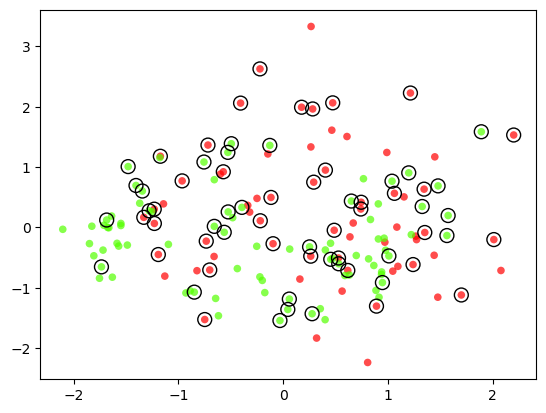

In [149]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, 
            cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [150]:
decision_function = clf.decision_function(X_res)
support_vector_indices = np.where((2 * y_res - 1) * decision_function <= 1)[0]
support_vectors = X_res[support_vector_indices]

In [151]:
support_vectors_pca = pca.transform(support_vectors)

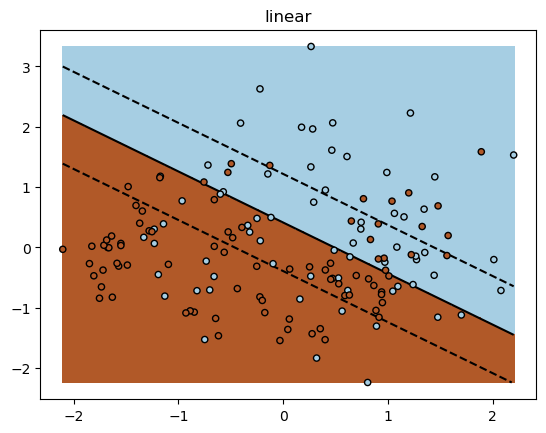

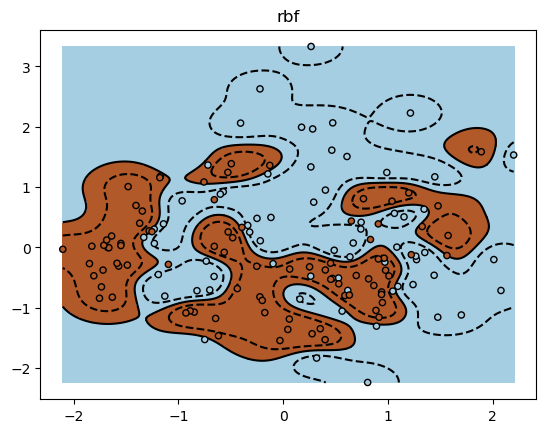

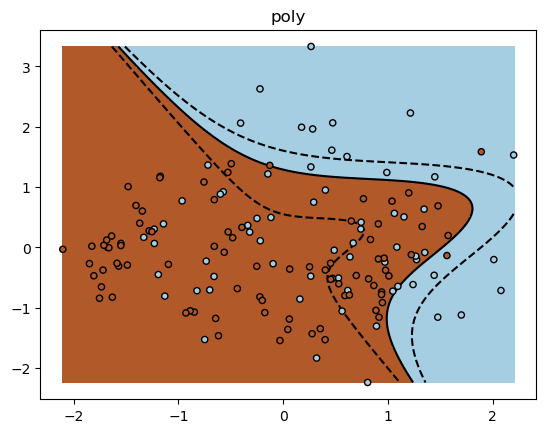

In [152]:
for kernel in ('linear', 'rbf', 'poly'):
    clf = SVC(kernel=kernel, gamma=10)
    clf.fit(X_res, y_res)

    plt.figure()
    plt.clf()
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
#     plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], s=80, facecolors='none',
#                 zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X_pca[:, 0].min()
    x_max = X_pca[:, 0].max()
    y_min = X_pca[:, 1].min()
    y_max = X_pca[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    clf.fit(X_pca, y_res)
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()

Show the different boundary for different kernel:
-Linear: just see previuos section
-Radial: Basis Function:The gamma parameters can be seen as the inverse of the radius of influence of   samples selected
-poly : the polynomial kernel looks not only at the given features of input samples to determine their similarity, but also combinations of these

# Neural Networks

In [279]:
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense

In [280]:
from scikeras.wrappers import KerasClassifier

In [281]:
from sklearn.model_selection import RandomizedSearchCV

In [282]:
#  build the model for neural networks
def build_model(meta, hidden_layer_sizes, activation):
    n_features_in_ = meta["n_features_in_"]
    n_classes_ = meta["n_classes_"]
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=(n_features_in_,)))
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, activation=activation))
    model.add(keras.layers.Dense(n_classes_, activation="softmax"))
    return model

In [302]:
#Use Sklearn wrapper
clf = KerasClassifier(
    model = build_model,
    loss = "sparse_categorical_crossentropy",
    verbose = False
)

In [303]:
#Parameter Tuning
params = {
    'optimizer__learning_rate': [0.001, 0.01, 0.1, 1],
    'model__hidden_layer_sizes': [(100, 100, 100), (50, 50, 50), (10, 10, 10), 
                                  (100, 50, 10), (10, 10, 10), (10, 10)],
    'model__activation': ['relu', 'tanh', 'sigmoid'],
    'optimizer': ["adam", "sgd"],
    'epochs': [10, 50, 100, 200]
}

gs = RandomizedSearchCV(clf, params, scoring='accuracy', n_jobs=-1, verbose=True, n_iter=15, cv=3)

In [304]:
#Fit and show results
gs.fit(X_res, y_res)

print(gs.best_score_, gs.best_params_)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
0.8781144781144782 {'optimizer__learning_rate': 0.01, 'optimizer': 'adam', 'model__hidden_layer_sizes': (100, 100, 100), 'model__activation': 'relu', 'epochs': 200}


In [289]:
par = {'n_features_in_': gs.n_features_in_ , 'n_classes_': len(gs.classes_)}

In [315]:
#Create new model with parameter found in randomizedSearch in order to show some plot
clf = KerasClassifier(
    model = build_model(par , (50, 50, 50), 'relu'),
    loss = "sparse_categorical_crossentropy",
)
clf.fit(X_res, y_res, epochs = 100, validation_split = 0.2) #Validation split to see if there is overfitting

Epoch 1/100
5/5 [==============================] - 1s 49ms/step - loss: 0.6576 - val_loss: 0.8432
Epoch 2/100
5/5 [==============================] - 0s 8ms/step - loss: 0.6250 - val_loss: 1.7275
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: 0.6003 - val_loss: 1.5296
Epoch 4/100
5/5 [==============================] - 0s 11ms/step - loss: 0.5723 - val_loss: 0.4371
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 0.5072 - val_loss: 1.2654
Epoch 6/100
5/5 [==============================] - 0s 10ms/step - loss: 0.4626 - val_loss: 1.0913
Epoch 7/100
5/5 [==============================] - 0s 13ms/step - loss: 0.4762 - val_loss: 0.7055
Epoch 8/100
5/5 [==============================] - 0s 11ms/step - loss: 0.3732 - val_loss: 0.8531
Epoch 9/100
5/5 [==============================] - 0s 11ms/step - loss: 0.3485 - val_loss: 0.2971
Epoch 10/100
5/5 [==============================] - 0s 10ms/step - loss: 0.3383 - val_loss: 0.3386
Epoch 11/100
5/5 [====

KerasClassifier(
	model=<keras.engine.sequential.Sequential object at 0x000001A3AFEB9AF0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=sparse_categorical_crossentropy
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [316]:
clf.model_.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_89 (Dense)            (None, 50)                11600     
                                                                 
 dense_90 (Dense)            (None, 50)                2550      
                                                                 
 dense_91 (Dense)            (None, 50)                2550      
                                                                 
 dense_92 (Dense)            (None, 2)                 102       
                                                                 
Total params: 16,802
Trainable params: 16,802
Non-trainable params: 0
_________________________________________________________________


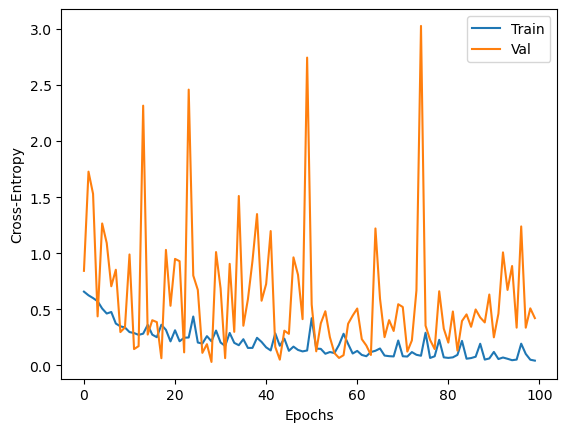

In [317]:
history = clf.history_
plt.plot(history['loss'], label='Train')
plt.plot(history['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

In [314]:
y_pred = gs.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9483037156704361
F1-score [0.95640327 0.93650794]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       356
           1       0.98      0.90      0.94       263

    accuracy                           0.95       619
   macro avg       0.95      0.94      0.95       619
weighted avg       0.95      0.95      0.95       619



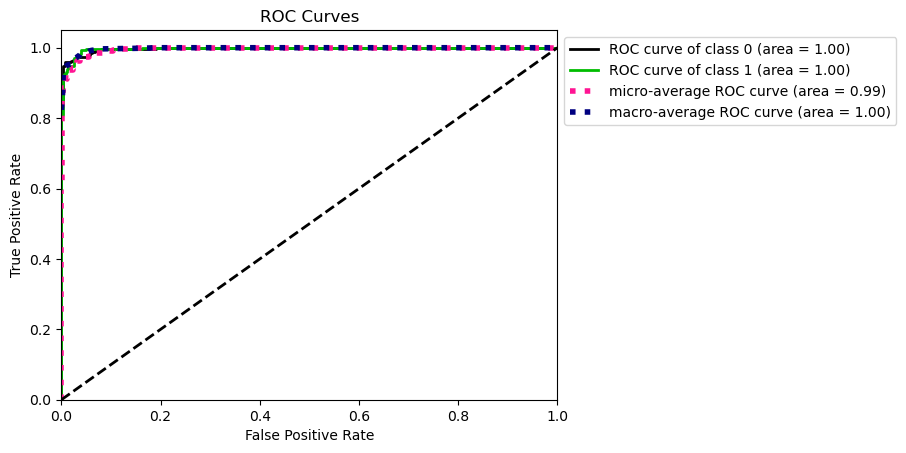

0.9971589695390267


In [153]:
y_test_pred_proba = gs.predict_proba(X_test)
plot_roc(y_test, y_test_pred_proba)
plt.legend(bbox_to_anchor=(1,1))
plt.show()
print(roc_auc_score(y_test, y_test_pred_proba[:, 1], multi_class='ovr', average='macro'))

# Ensemble methods

## Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [136]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
criterion = ['gini', 'entropy']
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion' : criterion }
print(param_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']}


In [137]:
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(random_state=42), scoring='accuracy',param_distributions = param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [138]:
rf_random.fit(X_res, y_res)
print(rf_random.best_score_, rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
0.8962585034013606 {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 20, 'criterion': 'gini', 'bootstrap': False}


In [139]:
y_pred = rf_random.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9531502423263328
F1-score [0.96032832 0.94280079]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       356
           1       0.98      0.91      0.94       263

    accuracy                           0.95       619
   macro avg       0.96      0.95      0.95       619
weighted avg       0.95      0.95      0.95       619



In [140]:
clf = RandomForestClassifier(**rf_random.best_params_)

In [141]:
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9515347334410339
F1-score [0.95867769 0.94140625]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       356
           1       0.97      0.92      0.94       263

    accuracy                           0.95       619
   macro avg       0.95      0.95      0.95       619
weighted avg       0.95      0.95      0.95       619



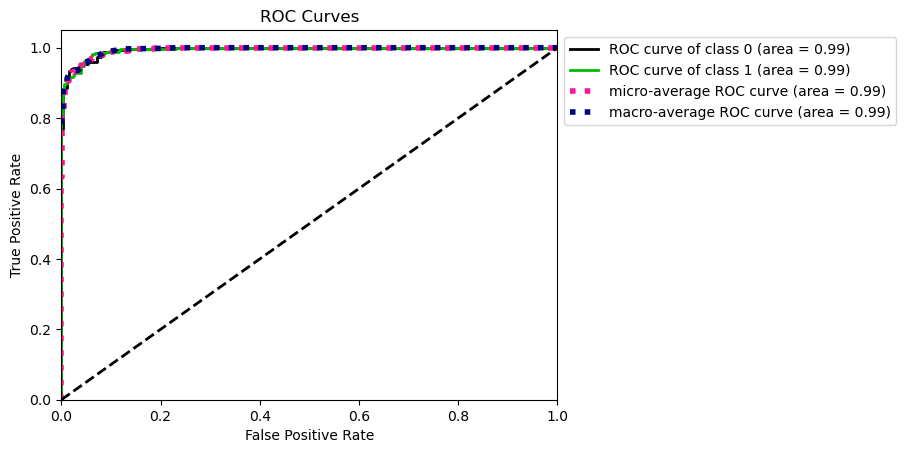

0.9942645362498399


In [142]:
from sklearn.metrics import roc_auc_score
from scikitplot.metrics import plot_roc

y_test_pred_proba = clf.predict_proba(X_test)
plot_roc(y_test, y_test_pred_proba)
plt.legend(bbox_to_anchor=(1,1))
plt.show()
print(roc_auc_score(y_test, y_test_pred_proba[:, 1], multi_class='ovr', average='macro'))

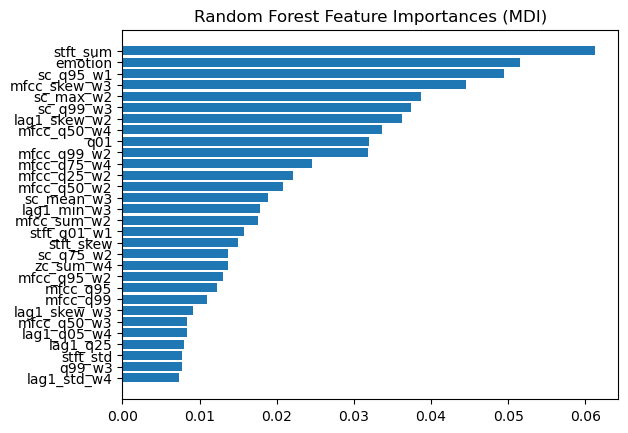

In [110]:
nbr_features = X_res.shape[1]

tree_feature_importances = clf.feature_importances_
sorted_idx = tree_feature_importances.argsort()[::-1][:30]
df2 = df.iloc[:, sorted_idx]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx][::-1])
plt.yticks(y_ticks, list(df2.columns)[::-1])
plt.title("Random Forest Feature Importances (MDI)")
plt.show()

In [105]:
from sklearn.inspection import permutation_importance

In [106]:
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

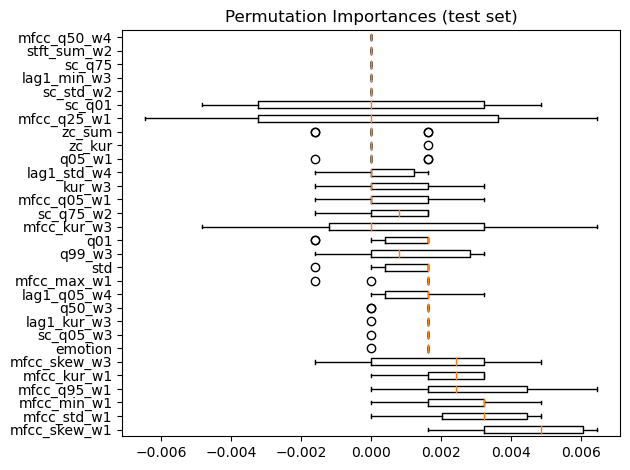

In [113]:
sorted_idx = result.importances_mean.argsort()[::-1][:30]
df2 = df.iloc[:, sorted_idx]

fig, ax = plt.subplots()
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=list(df2.columns)[::-1])
plt.title("Permutation Importances (test set)")
plt.tight_layout()
plt.show()

In [114]:
from sklearn.tree import plot_tree

In [115]:
clf.estimators_[0]

DecisionTreeClassifier(max_depth=20, max_features='auto', min_samples_leaf=4,
                       min_samples_split=5, random_state=1783105982)

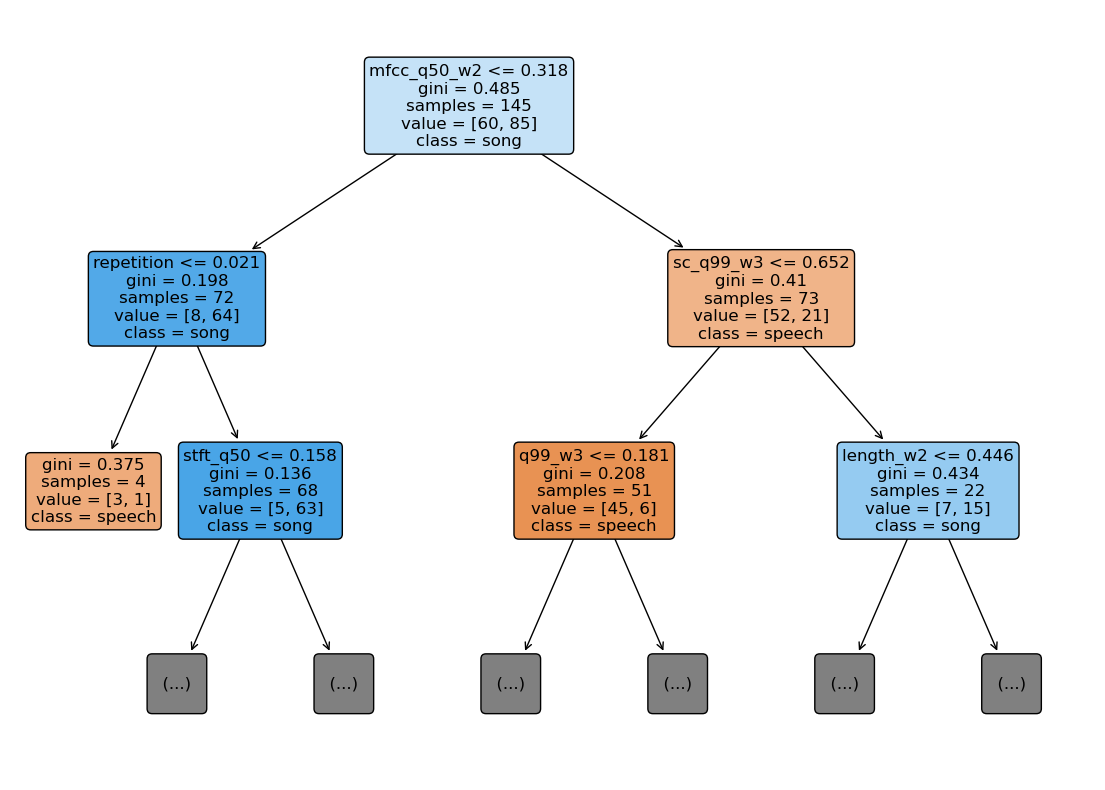

In [119]:
plt.figure(figsize=(14,10))
plot_tree(clf.estimators_[0], 
          feature_names=df.columns, 
          class_names=['speech', 'song'], 
          filled=True, 
          rounded=True,
          fontsize=12,
          max_depth=2)  
plt.show()

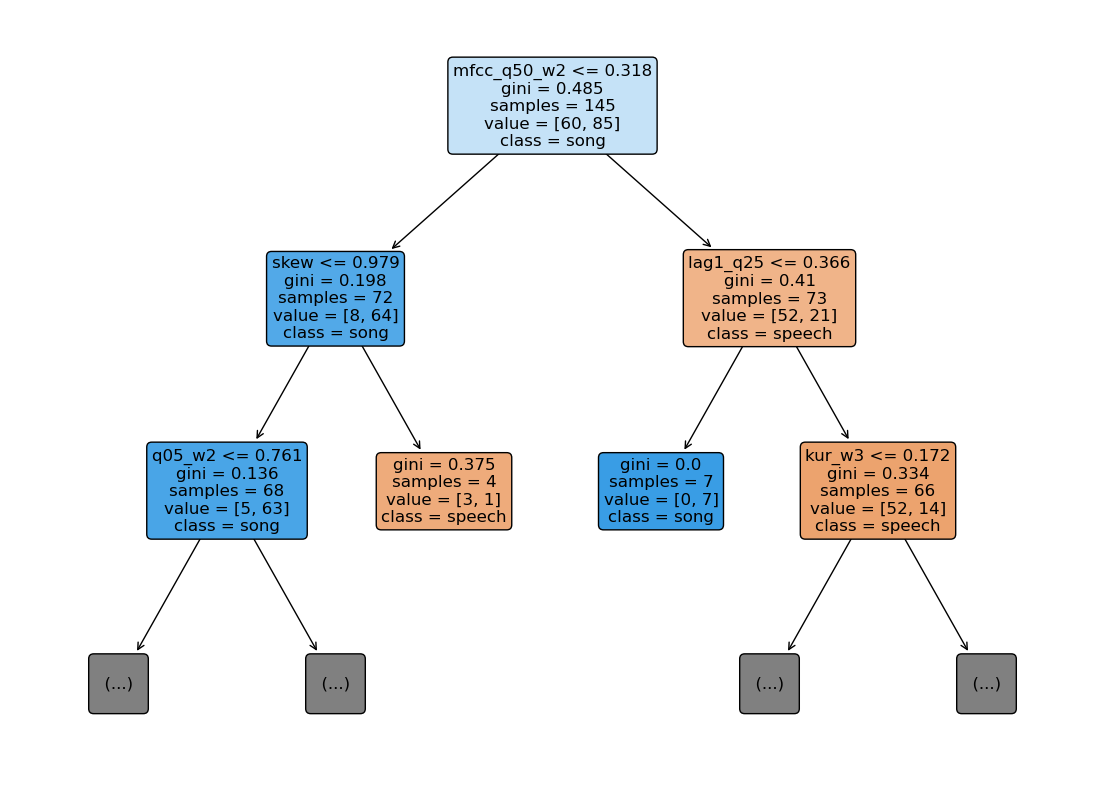

In [120]:
plt.figure(figsize=(14,10))
plot_tree(clf.estimators_[1], 
          feature_names=df.columns, 
          class_names=['speech', 'song'], 
          filled=True, 
          rounded=True,
          fontsize=12,
          max_depth=2)  
plt.show()

# Gradient Boosting

In [121]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [125]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

In [131]:
clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_jobs=-1)
clf.fit(X_res, y_res)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mae'],
                         'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15,
                                           0.2],
                         'loss': ['deviance'],
                         'min_samples_leaf': array([0.1       , 0.13636364, 0.17272727, 0.20909091, 0.24545455,
       0.28181818, 0.31818182, 0.35454545, 0.39090909, 0.42727273,
       0.46363636, 0.5       ]),
                         'n_estimators': [10]})

In [132]:
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9434571890145396
F1-score [0.95007133 0.93482309]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       356
           1       0.92      0.95      0.93       263

    accuracy                           0.94       619
   macro avg       0.94      0.94      0.94       619
weighted avg       0.94      0.94      0.94       619



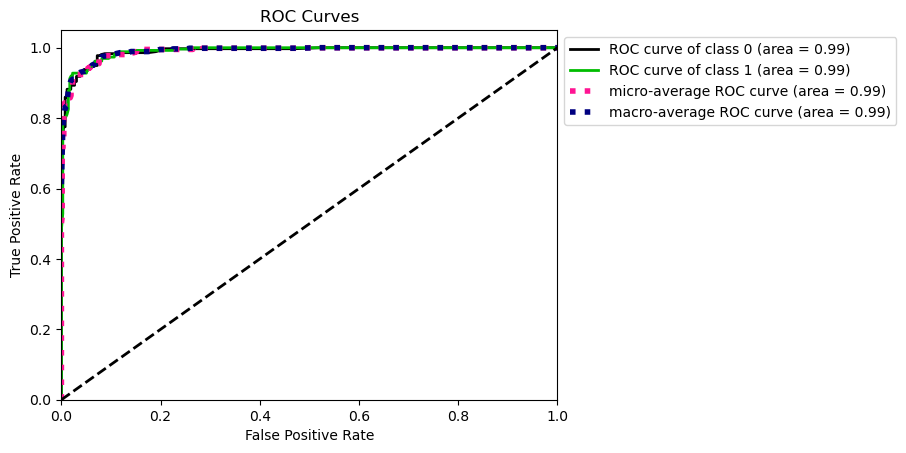

0.9901792198914856


In [134]:
y_test_pred_proba = clf.predict_proba(X_test)
plot_roc(y_test, y_test_pred_proba)
plt.legend(bbox_to_anchor=(1,1))
plt.show()
print(roc_auc_score(y_test, y_test_pred_proba[:, 1], multi_class='ovr', average='macro'))

# Oversampling
## SMOTE

In [240]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print(f'Starting dataset shape {Counter(y_train)}')
print(f'Resampled dataset shape {Counter(y_res)}')

Starting dataset shape Counter({0: 1070, 1: 85})
Resampled dataset shape Counter({0: 1070, 1: 1070})


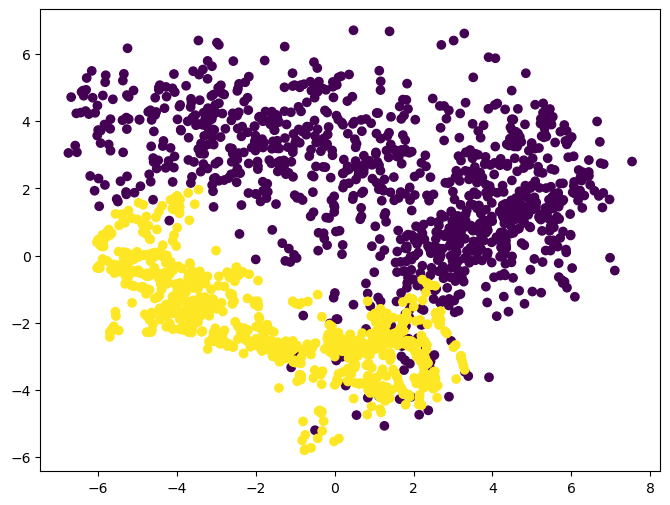

In [241]:
isomap = Isomap(n_components=2, n_neighbors=10)
embedding = isomap.fit_transform(X_res)

plt.figure(figsize=(8, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=y_res, cmap='viridis')
plt.show()

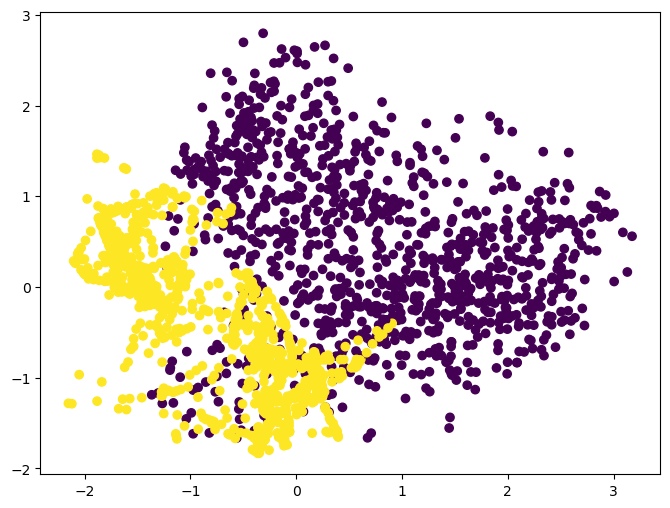

In [242]:
pca = PCA(n_components=2)
embedding = pca.fit_transform(X_res)

plt.figure(figsize=(8, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=y_res, cmap='viridis')
plt.show()

# Logistic Regression

In [243]:
parameters = [{'solver': ['lbfgs', 'liblinear', 'saga', 'newton-cg']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]



grid = GridSearchCV(estimator = LogisticRegression(),  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = RepeatedStratifiedKFold(random_state=0),
                           )


grid.fit(X_res.T[0].reshape(-1,1), y_res)
clf = grid.best_estimator_
print(grid.best_params_, grid.best_score_)

{'solver': 'liblinear'} 0.9439252336448598


C:\Users\emanu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\emanu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\emanu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\emanu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Va

In [244]:
clf.score(X_test.T[0].reshape(-1,1), y_test),  clf.intercept_, clf.coef_

(0.9240710823909531, array([-5.62739733]), array([[15.32137114]]))

In [245]:
y_test_pred = clf.predict(X_test.T[0].reshape(-1,1))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       356
           1       0.88      0.95      0.91       263

    accuracy                           0.92       619
   macro avg       0.92      0.93      0.92       619
weighted avg       0.93      0.92      0.92       619



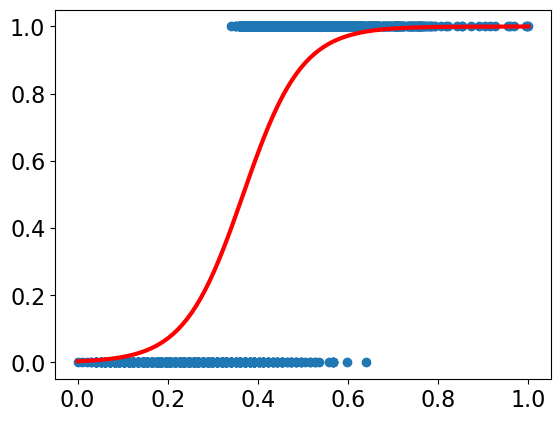

In [246]:
from scipy.special import expit

loss = expit(sorted(X_test.T[0].reshape(-1,1)) *clf.coef_.T[0] + clf.intercept_).ravel()
plt.plot(sorted(X_test.T[0].reshape(-1,1)), loss, color='red', linewidth=3)
plt.scatter(X_res.T[0].reshape(-1,1), y_res)
#plt.xlabel(selected_columns[0], fontsize=16)
#plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

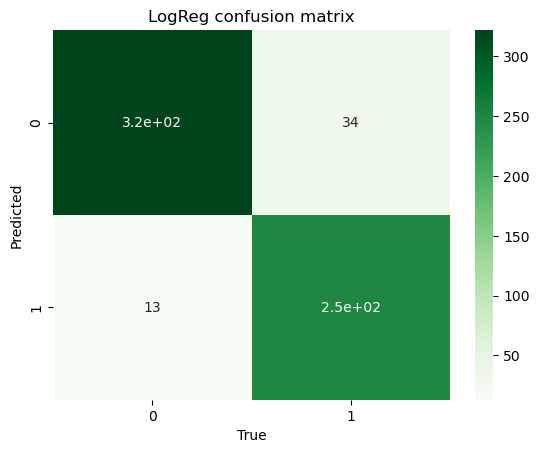

In [247]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf, annot=True, cmap='Greens')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('LogReg confusion matrix')
plt.show()

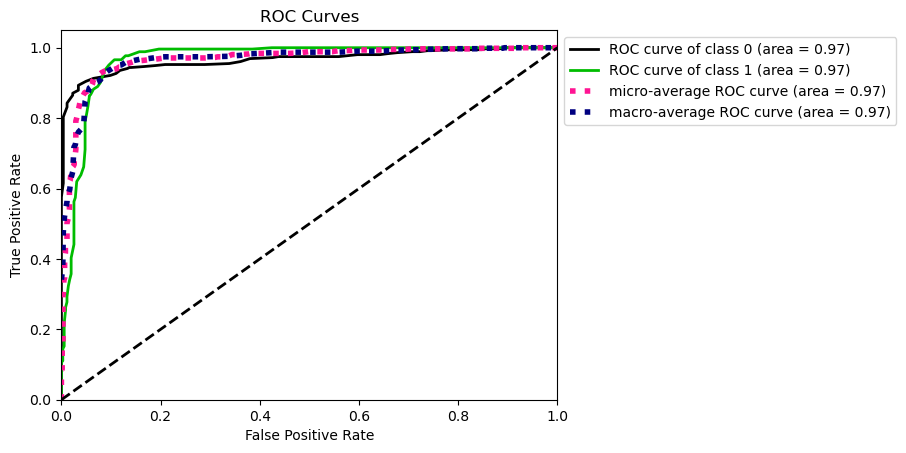

0.9655658563677533


In [249]:
from sklearn.metrics import roc_auc_score
from scikitplot.metrics import plot_roc

y_test_pred_proba = clf.predict_proba(X_test.T[0].reshape(-1,1))
plot_roc(y_test, y_test_pred_proba)
plt.legend(bbox_to_anchor=(1,1))
plt.show()
print(roc_auc_score(y_test, y_test_pred_proba[:, 1], multi_class='ovr', average='macro'))